In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

1] Given dataframe have 12 varables(columns) and 891 datapoints(rows).

2] Survived is target variable. or label which we have to predict.

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


1] PassengerId feature Observations :
    
    1] Average of PassengerId feature is 446.0 
    
    2] Minimum of PassengerId feature is 1
    
    3] Maximum of PassengerId feature is 891
____________________________________________________________
2] Survived feature Observations :
    
    1] Average of Survived feature is 0.3838383838383838 
    
    2] Minimum of Survived feature is 0
    
    3] Maximum of Survived feature is 1
____________________________________________________________
3] Pclass feature Observations :
    
    1] Average of Pclass feature is 2.308641975308642 
    
    2] Minimum of Pclass feature is 1
    
    3] Maximum of Pclass feature is 3
____________________________________________________________
4] Age feature Observations :
    
    1] Average of Age feature is 29.69911764705882 
    
    2] Minimum of Age feature is 0.42
    
    3] Maximum of Age feature is 80.0
____________________________________________________________
5] SibSp feature Observations :
    
    1] Average of SibSp feature is 0.5230078563411896 
    
    2] Minimum of SibSp feature is 0
    
    3] Maximum of SibSp feature is 8
____________________________________________________________
6] Parch feature Observations :
    
    1] Average of Parch feature is 0.38159371492704824 
    
    2] Minimum of Parch feature is 0
    
    3] Maximum of Parch feature is 6
____________________________________________________________
7] Fare feature Observations :
    
    1] Average of Fare feature is 32.2042079685746 
    
    2] Minimum of Fare feature is 0.0
    
    3] Maximum of Fare feature is 512.3292
____________________________________________________________

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* Continuous: 
       1] Age , Fare
 
* categorical :  

       1] int :  PassengerId , Survived,Pclass,SibSp,Parch
            
       2] Object: Name,Sex,Ticket,Caabin,Embarked     

* seprate Categorical and Continuous features

In [8]:
cont=[]
cat=[]
for i in df.columns:
    if df[i].dtype==np.number:
        cont.append(i)
    else:
        cat.append(i)
print('Continuous feature :\n',cont)
print("*************************************************")
print("Categorical Features :\n",cat)

Continuous feature :
 ['Age', 'Fare']
*************************************************
Categorical Features :
 ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked']


* Lets Analyse for NaN in features

In [9]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df.isna().sum().sum()

866

* Analyse NaN with heatmap

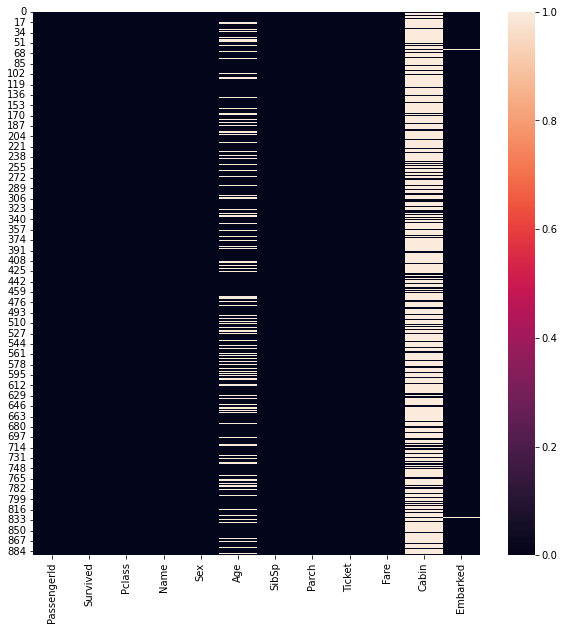

In [11]:
fig1=plt.figure(figsize=(10,10))
sns.heatmap(df.isnull())
plt.show()

* Cabin feature has 687 datapoints having missing values.

* Age Feature has 177 datapoints with missing values.

* Embarked feature have 02 NaN .

* Lets analyse categorical variables

In [12]:
df['PassengerId'].unique()


array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

* It is index number for each passenger wi will remove it 

* 1]  PassengerId feature

In [13]:
df=df.drop(columns=["PassengerId"],axis=1)

In [14]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

2] Survived feature

In [15]:
df['Survived'].unique()

array([0, 1], dtype=int64)

In [16]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:>

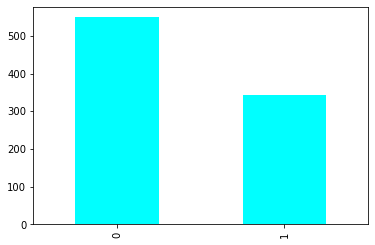

In [17]:
df["Survived"].value_counts().plot.bar(color='cyan')

* Survived variable is label in this dataset.

1] It has two categories 1 survived and 0 for died .

2] 1 have 549 and  0 have 342 datapoints.


2] Pclass feature

In [18]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [19]:
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:>

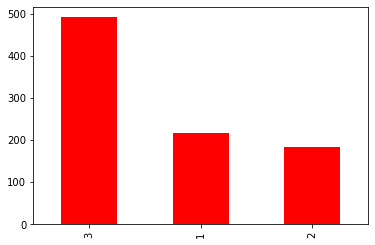

In [20]:
df["Pclass"].value_counts().plot.bar(color='red')

* 1] Pclass is Passenger Class having 3 categories of passengers.
 
  2] most passengers belongs to 3 class ,1 and 2 class have nearly same passengers.

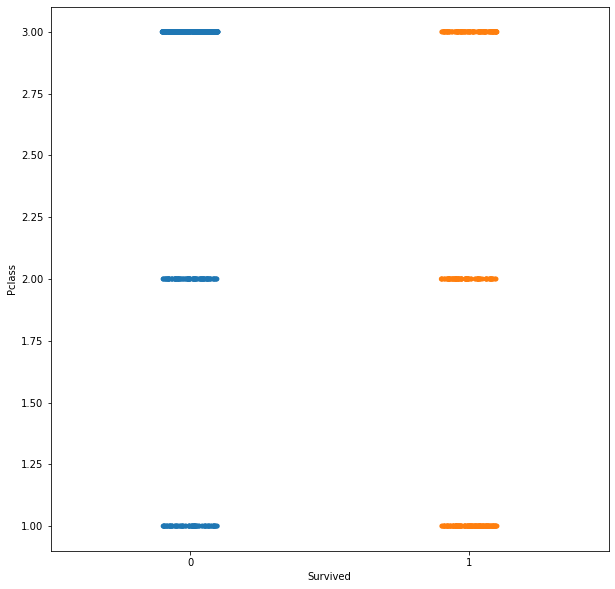

In [21]:
plt.figure(figsize=(10,10))
sns.stripplot(x=df["Survived"],y=df['Pclass'],data=df)
plt.show()

* It is observed that there are nearly equal number of passenger who have survived and died according to pclass.

3] SibSp feature

In [22]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [23]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

<AxesSubplot:>

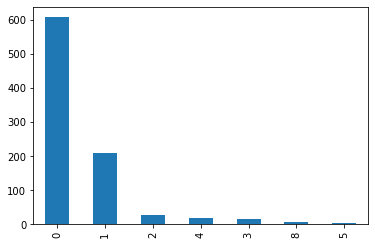

In [24]:
df['SibSp'].value_counts().plot.bar()

* There are 7 categories in SibSp feature.

1] Large number of Passenger belongs to 0 category and 1 category.

2] Other category have less number of passengers.

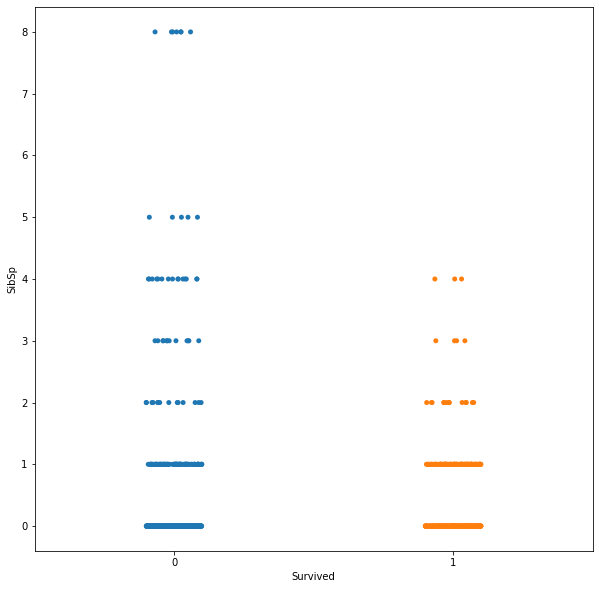

In [25]:
plt.figure(figsize=(10,10))
sns.stripplot(x=df["Survived"],y=df['SibSp'],data=df)
plt.show()

* 1] The percentage of survival of passenger beongs to  0,1,2 SibSp is high.
  
  2] There is low percentage of survival of passenger belongs to 3,4 SibSp category.
  
  3] The passenger belongs to 5,8 SibSp have not surbvived.

In [26]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [27]:
df["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [28]:
df["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

<AxesSubplot:>

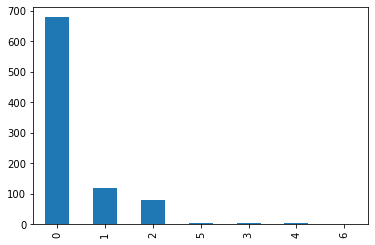

In [29]:
df["Parch"].value_counts().plot.bar()

1] There are very less number of passengers belongs to  4,5,6 Parch categories.

2] 

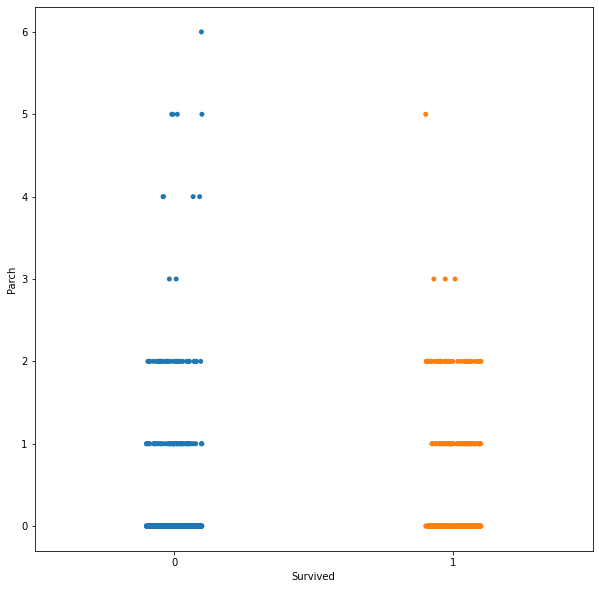

In [30]:
plt.figure(figsize=(10,10))
sns.stripplot(x=df["Survived"],y=df['Parch'],data=df)
plt.show()

1]  There is low percentage of survival of passengers belongs to 4,5,6 Parch catrgories.

 

* Itriducing new column which will be substraction of SibSp an Parch

In [31]:
df["Family"]=df["SibSp"]-df["Parch"]

In [32]:
df["Family"].unique()

array([ 1,  0,  2, -2, -4,  3, -1,  6, -3, -5], dtype=int64)

In [33]:
df["Family"].value_counts()

 0    598
 1    137
-1     58
 2     32
-2     32
 3     16
 6      7
-4      4
-3      4
-5      3
Name: Family, dtype: int64

<AxesSubplot:>

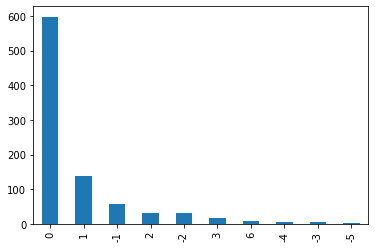

In [34]:
df["Family"].value_counts().plot.bar()

* Family feature has same trend as observed in Parch and SibSp.

In [35]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Family'],
      dtype='object')

5] Ticket feature

In [36]:
len(df["Ticket"].unique())

681

1] As there very large amount of categories in Ticket feature we will remove it.

2] Cabin feature have very large amount Nan so It is better to remove as it has 687 out of 891 datapoints.

3] Name feature wil also removed as Name has no use in preediction.

4] we have already removed PassengerId feature.

5] we have added new feature named as Family which is additon of SibSp and Parch .

In [37]:
df=df.drop(columns=['Name',"Ticket",'Cabin'],axis=1)

In [38]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


In [39]:
df.shape

(891, 9)

In [40]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [41]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:>

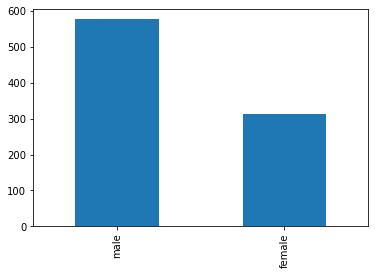

In [42]:
df['Sex'].value_counts().plot.bar()

* There are male passenger are more ascompared to female passenger.


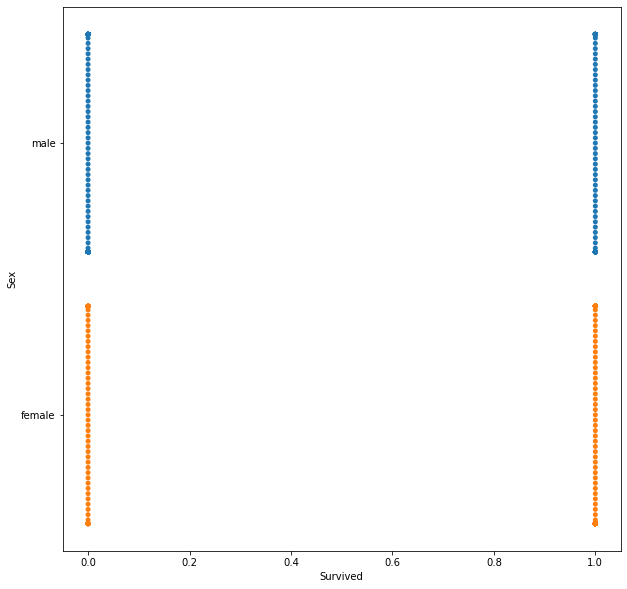

In [43]:
plt.figure(figsize=(10,10))
sns.swarmplot(x=df["Survived"],y=df['Sex'],data=df)
plt.show()

* There is no variance observed for male to female in survival.

6] Embarked feature

In [44]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [45]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

* There are NaN present in Embarked.
 it will remove when neccesary.
    

<AxesSubplot:>

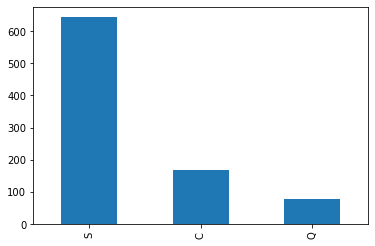

In [46]:
df['Embarked'].value_counts().plot.bar()

* Embarked has 3 categories S with 644, C with 168 and  Q with 77 datapoints .

1] Passenger which are embarked from S have large population.

2] Passenger which are embarked from Q have lowest  population.

3]  Passenger which are embarked from c have low  population.

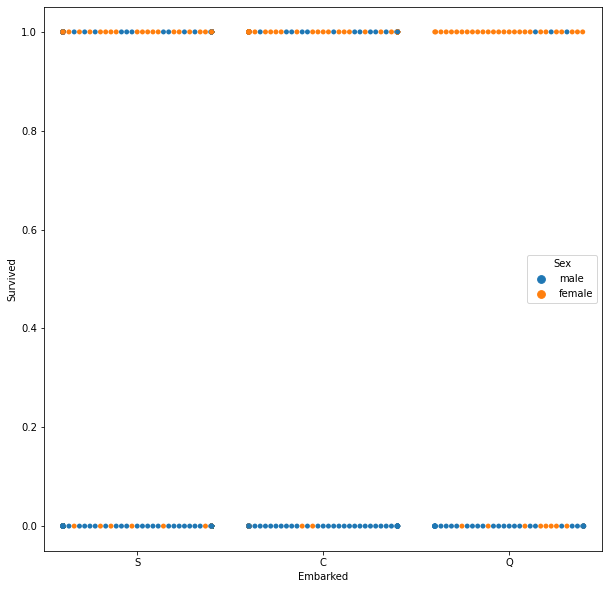

In [47]:
plt.figure(figsize=(10,10))
sns.swarmplot(x=df["Embarked"],y=df['Survived'],data=df,hue=df["Sex"])
plt.show()

1] Survived passenger are female mostly as it can be observed from plot.


2]passengers who have have embarked from Q which are survived have large number of female passengers. 

7] Age feature.

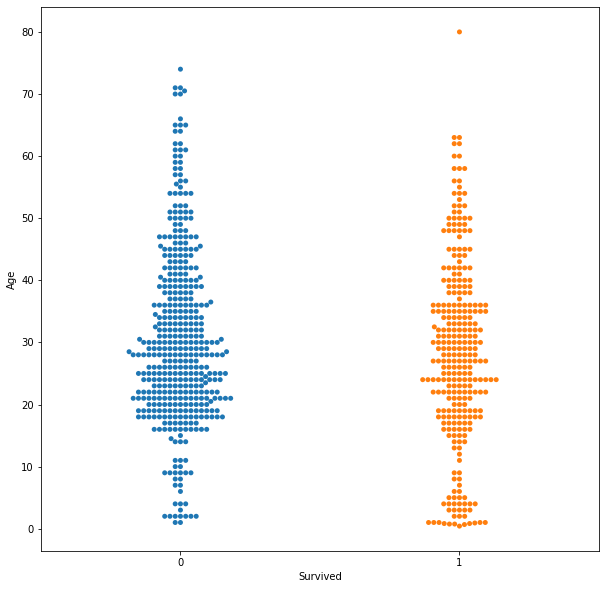

In [48]:
plt.figure(figsize=(10,10))
sns.swarmplot(x=df["Survived"],y=df['Age'],data=df)
plt.show()

* Groupby Survived

In [49]:
df['Age'].groupby(df["Survived"]).mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

<AxesSubplot:title={'center':'Age Gruopby Survived'}, xlabel='Survived'>

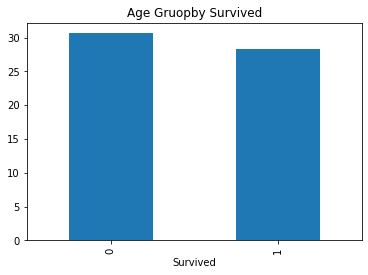

In [50]:
df['Age'].groupby(df["Survived"]).mean().plot.bar(title="Age Gruopby Survived")

* Groupby Pclass

In [51]:
df['Age'].groupby(df["Pclass"]).mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

<AxesSubplot:title={'center':'Age Gruopby Pclass'}, xlabel='Pclass'>

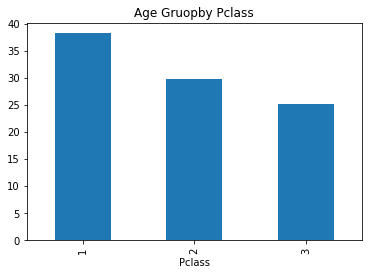

In [52]:
df['Age'].groupby(df["Pclass"]).mean().plot.bar(title="Age Gruopby Pclass")

* Groupby Embarked

In [53]:
df['Age'].groupby(df["Embarked"]).mean()

Embarked
C    30.814769
Q    28.089286
S    29.445397
Name: Age, dtype: float64

<AxesSubplot:title={'center':'Age Gruopby Embarked'}, xlabel='Embarked'>

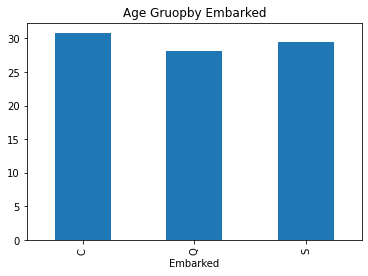

In [54]:
df['Age'].groupby(df["Embarked"]).mean().plot.bar(title="Age Gruopby Embarked")

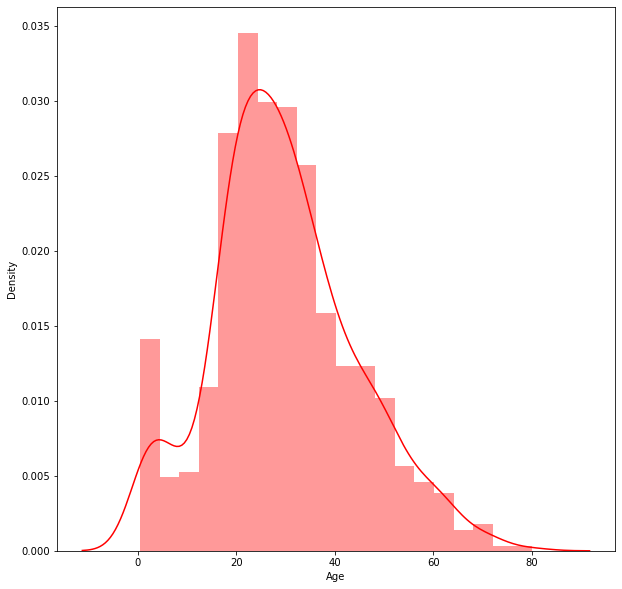

In [55]:
plt.figure(figsize=(10,10))
sns.distplot(df["Age"],color='red')
plt.show()

* Age feature distribution is some what normal in nature.


In [56]:
df_age=df[["Age","Fare","Embarked","Pclass"]][(df["Age"].isnull()==True)]
df_age

,Age,Fare,Embarked,Pclass
5,NaN,8.4583,Q,3
17,NaN,13.0000,S,2
19,NaN,7.2250,C,3
26,NaN,7.2250,C,3
28,NaN,7.8792,Q,3
...,...,...,...,...
859,NaN,7.2292,C,3
863,NaN,69.5500,S,3
868,NaN,9.5000,S,3
878,NaN,7.8958,S,3


In [57]:
df_age["Pclass"].value_counts()

3    136
1     30
2     11
Name: Pclass, dtype: int64

In [58]:
df_age["Embarked"].value_counts()

S    90
Q    49
C    38
Name: Embarked, dtype: int64

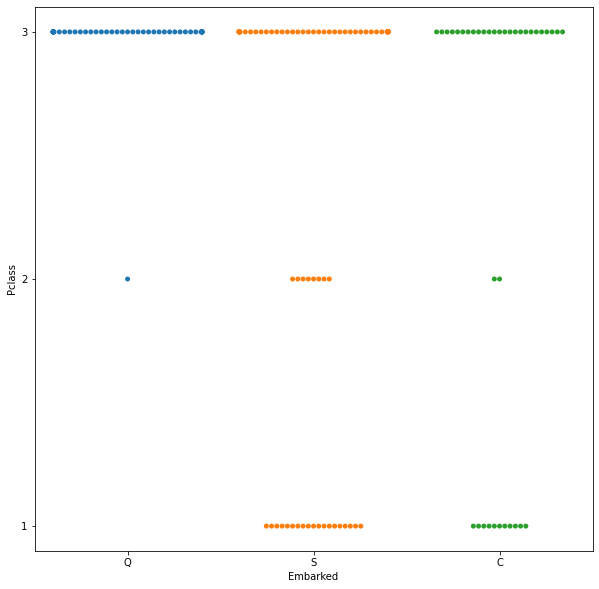

In [59]:
plt.figure(figsize=(10,10))
sns.swarmplot(x=df_age["Embarked"],y=df_age["Pclass"])
plt.yticks(range(1,4))
plt.show()

* There is no specific Pclass or Embarked responsible for missing data.



* Lets analyse for Fare feature of missing datapoints in nan.

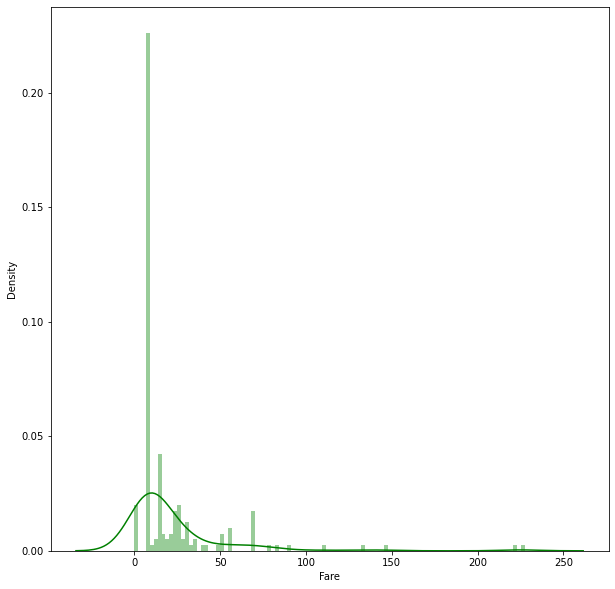

In [60]:
plt.figure(figsize=(10,10))
sns.distplot(df_age["Fare"],bins=100,color='green')
plt.show()

* It can obesrved from graph missing values are observed mostly for passenger have low fare .
but it canot help in imputation of Age missing data.

* I will stop ananlysing for Age feature nan. 

* Imputation of NaN in Age feature with man ages gruopby sex category as there is age feature have 
  some variance with male to female


In [61]:
df.groupby("Sex")["Age"].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [62]:
df.groupby("Sex")["Age"].transform('mean')

0      30.726645
1      27.915709
2      27.915709
3      27.915709
4      30.726645
         ...    
886    30.726645
887    27.915709
888    27.915709
889    30.726645
890    30.726645
Name: Age, Length: 891, dtype: float64

In [63]:
df["Age"].fillna(value=df.groupby("Sex")["Age"].transform('mean'))

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    27.915709
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

* Distribution, outliers analysis of after imputation and before imputaion for comaparison and effectiveness.

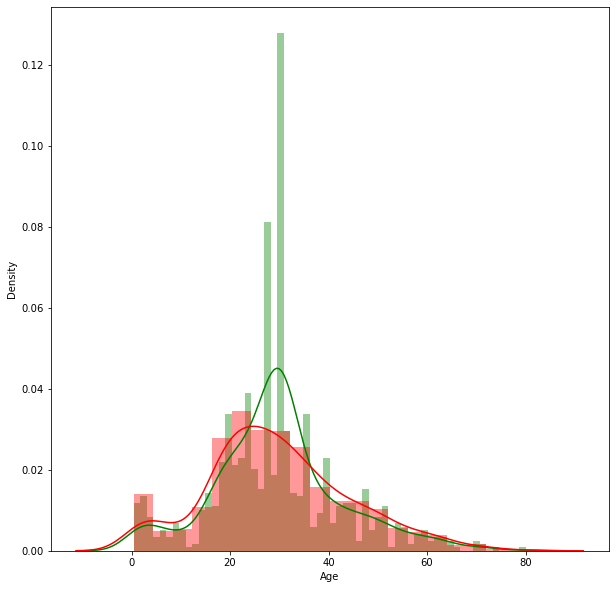

In [64]:
plt.figure(figsize=(10,10))
sns.distplot(df["Age"].fillna(value=df.groupby("Sex")["Age"].transform('mean')),bins=60,color='green')
sns.distplot(df["Age"],color='red')
plt.show()

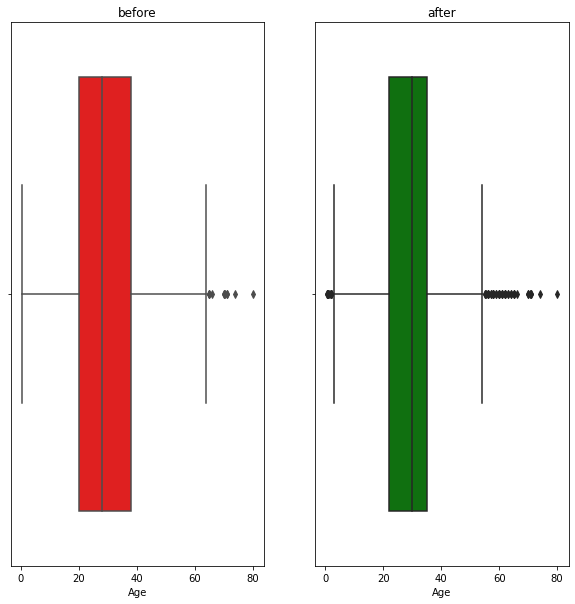

In [65]:
fig=plt.figure(figsize=(10,10))
fig.add_subplot(1,2,1)
sns.boxplot(df["Age"],color='red')
plt.title("before")
fig.add_subplot(1,2,2)
sns.boxplot(df["Age"].fillna(value=df.groupby("Sex")["Age"].transform('mean')),color='green')
plt.title("after")
plt.show()

1] Distribution has improve toward normal.

2] outliers has increase by some amount.

* Now we will make changes to dataframe , impute missing values permanantly.

In [66]:
df["Age"].fillna(value=df.groupby("Sex")["Age"].transform('mean'),inplace=True)

8] Analyse for Fare Feature.

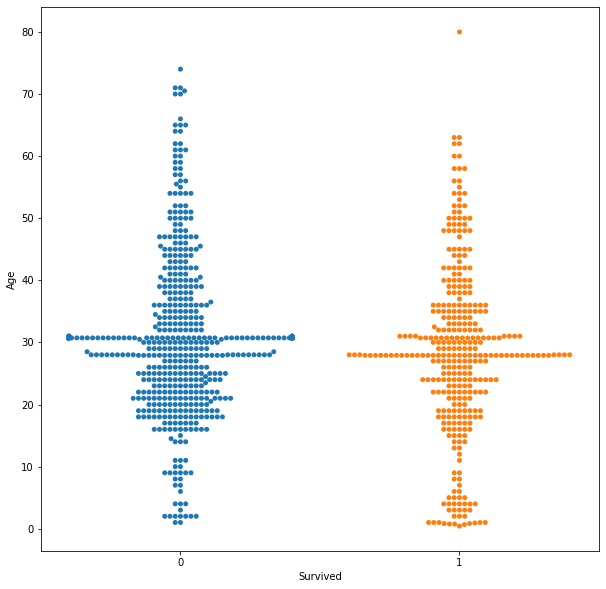

In [67]:
plt.figure(figsize=(10,10))
sns.swarmplot(x=df["Survived"],y=df['Age'],data=df)
plt.show()

* Fare Groupby Survived

In [68]:
df['Fare'].groupby(df["Survived"]).mean()

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

<AxesSubplot:title={'center':'Fare groupby Survived'}, xlabel='Survived'>

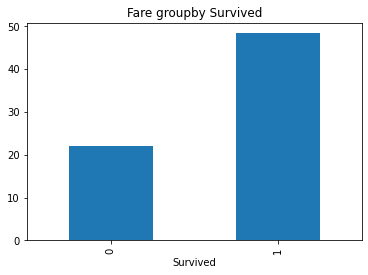

In [69]:
df['Fare'].groupby(df["Survived"]).mean().plot.bar(title="Fare groupby Survived")

* Fare Groupby Pclass

In [70]:
df['Fare'].groupby(df["Pclass"]).mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

<AxesSubplot:title={'center':'Fare Groupby Pclass'}, xlabel='Pclass'>

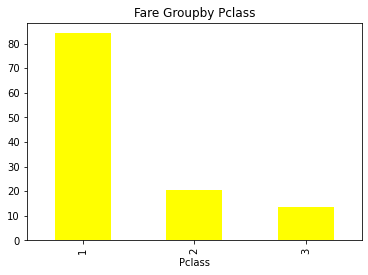

In [71]:
df['Fare'].groupby(df["Pclass"]).mean().plot.bar(color='yellow',title='Fare Groupby Pclass')

*

* Fare groupby Embarked

In [72]:
df['Fare'].groupby(df["Embarked"]).mean()

Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64

<AxesSubplot:title={'center':'Fare Groupby Embarked'}, xlabel='Embarked'>

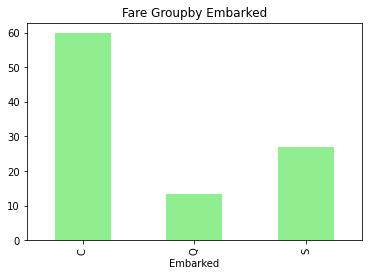

In [73]:
df['Fare'].groupby(df["Embarked"]).mean().plot.bar(color='lightgreen',title='Fare Groupby Embarked')

* Encoding Categorical columns.

In [74]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


In [75]:
df.shape

(891, 9)

In [76]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Family      0
dtype: int64

In [77]:
df.dropna(axis=0,inplace=True)

In [78]:
df.shape

(889, 9)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
 8   Family    889 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


* There are two columns having object datatype.

  1] Sex
    
  2] Embarked

In [80]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df["Embarked"]=le.fit_transform(df['Embarked'])
df["Sex"]=le.fit_transform(df["Sex"])

In [81]:
df["Embarked"].value_counts()

2    644
0    168
1     77
Name: Embarked, dtype: int64

In [82]:
df["Sex"].value_counts()

1    577
0    312
Name: Sex, dtype: int64

In [83]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.649044,29.690446,0.524184,0.382452,32.096681,1.535433,0.141732
std,0.486260,0.834700,0.477538,12.981441,1.103705,0.806761,49.697504,0.792088,1.063386
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,-5.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,1.000000,0.000000
50%,0.000000,3.000000,1.000000,30.000000,0.000000,0.000000,14.454200,2.000000,0.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000,0.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,6.000000


* Lets check for outliers as Outliers are observed in Age and Fare which are continuous in nature.

In [84]:
from scipy.stats import zscore
cont

['Age', 'Fare']

In [85]:
z=np.abs(zscore(df[cont]))
df[(z<3).all(axis=1)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,0,3,1,22.000000,1,0,7.2500,2,1
1,1,1,0,38.000000,1,0,71.2833,0,1
2,1,3,0,26.000000,0,0,7.9250,2,0
3,1,1,0,35.000000,1,0,53.1000,2,1
4,0,3,1,35.000000,0,0,8.0500,2,0
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2,0
887,1,1,0,19.000000,0,0,30.0000,2,0
888,0,3,0,27.915709,1,2,23.4500,2,-1
889,1,1,1,26.000000,0,0,30.0000,0,0


In [86]:
rows_after=df[(z<3).all(axis=1)].shape[0]
rows_before=df.shape[0]

In [87]:
loss=((rows_before-rows_after)/rows_before)*100
loss

3.0371203599550056

* Data loss after removal of outliers with zscore method is about 3 % hence we will proceed with outliers removal.

In [88]:
df=df[(z<3).all(axis=1)]

In [89]:
df.shape

(862, 9)

In [90]:
df["Survived"].value_counts()

0    537
1    325
Name: Survived, dtype: int64

* Lets analyse feature with distribution plots.

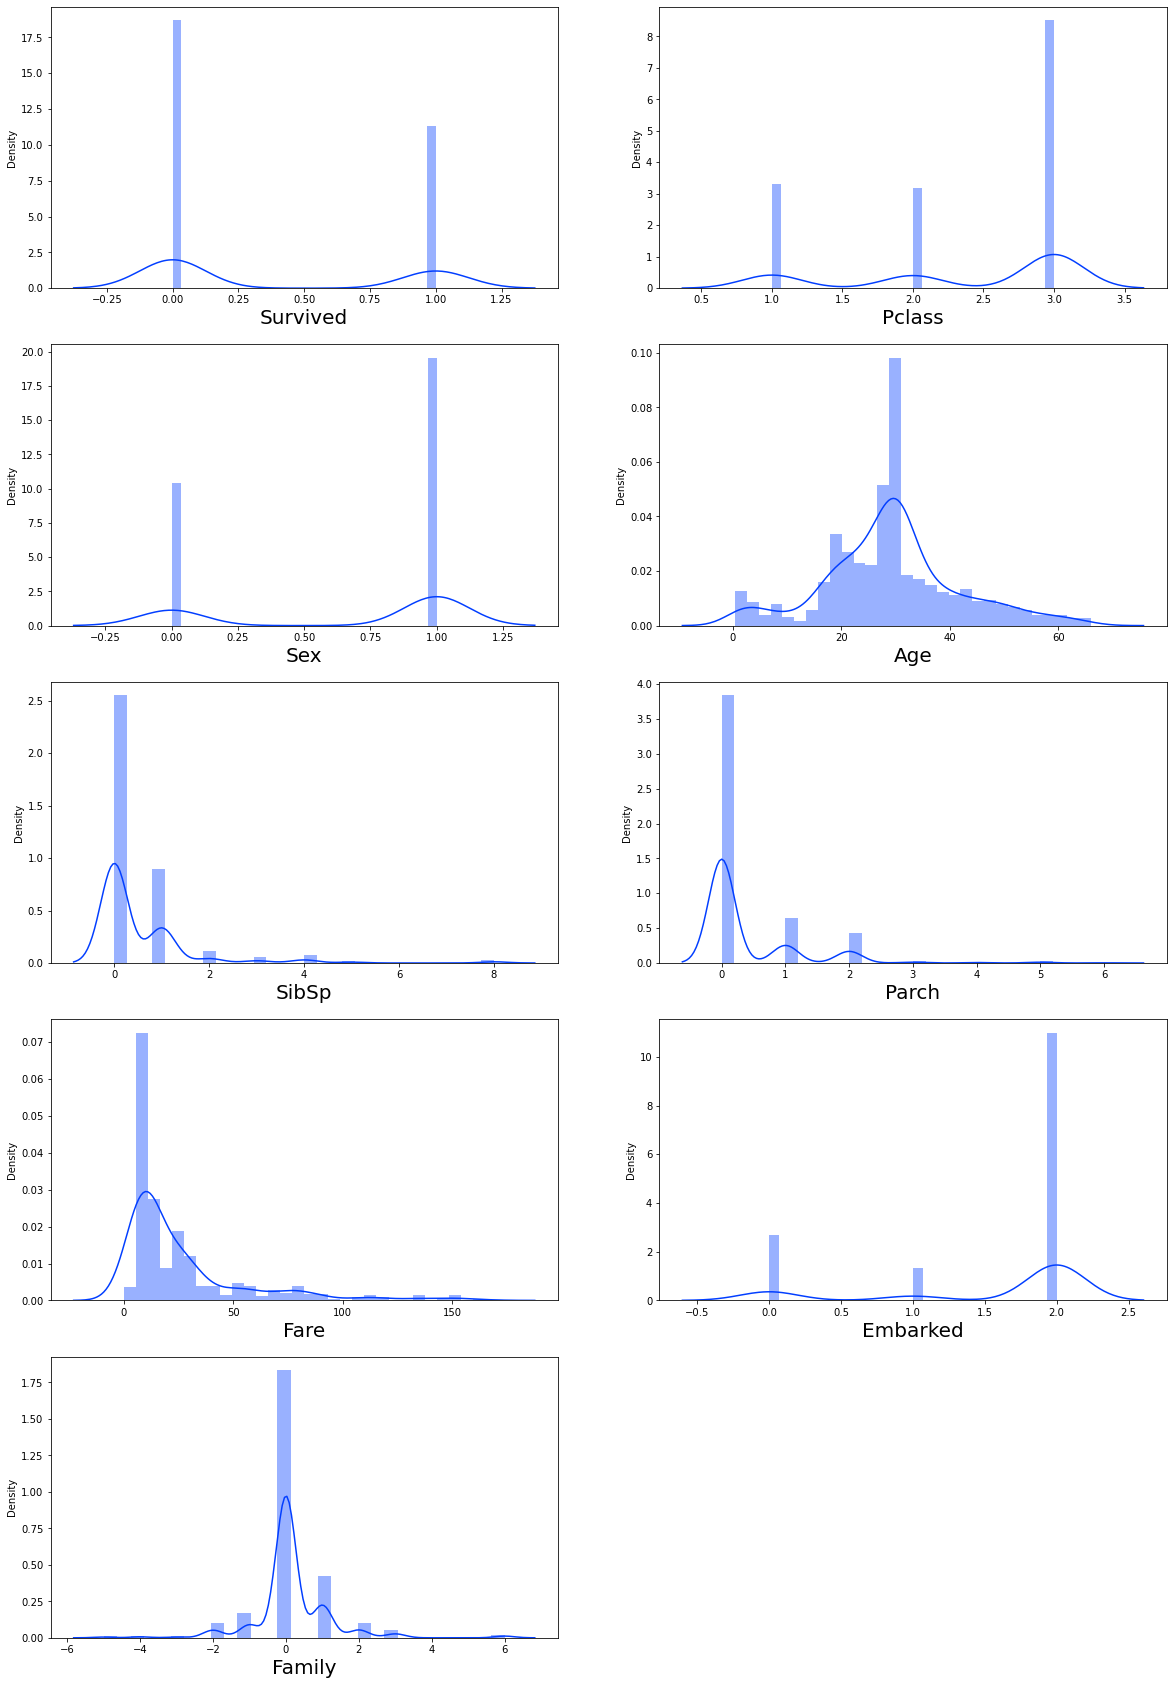

<Figure size 432x288 with 0 Axes>

In [91]:
plt.figure(figsize=(20,30))
sns.set_palette('bright')
graph=1

for column in df.columns:
    if graph<=9:
        ax=plt.subplot(5,2,graph)
        sns.distplot(df[column],bins=30,kde=True)
        plt.xlabel(column,fontsize=20)
        
    graph+=1
plt.show()
plt.tight_layout()

In [92]:
corr=df.corr().abs()
corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
Survived,1.000000,0.330316,0.532119,0.080061,0.040419,0.081619,0.297091,0.163874,0.102759
Pclass,0.330316,1.000000,0.119426,0.332370,0.092388,0.049477,0.650981,0.135535,0.058891
Sex,0.532119,0.119426,1.000000,0.094545,0.111024,0.252229,0.229921,0.107634,0.072961
Age,0.080061,0.332370,0.094545,1.000000,0.234785,0.195967,0.119612,0.017363,0.097294
SibSp,0.040419,0.092388,0.111024,0.234785,1.000000,0.407982,0.248787,0.064083,0.732536
Parch,0.081619,0.049477,0.252229,0.195967,0.407982,1.000000,0.232400,0.046297,0.322636
Fare,0.297091,0.650981,0.229921,0.119612,0.248787,0.232400,1.000000,0.178513,0.084647
Embarked,0.163874,0.135535,0.107634,0.017363,0.064083,0.046297,0.178513,1.000000,0.031918
Family,0.102759,0.058891,0.072961,0.097294,0.732536,0.322636,0.084647,0.031918,1.000000


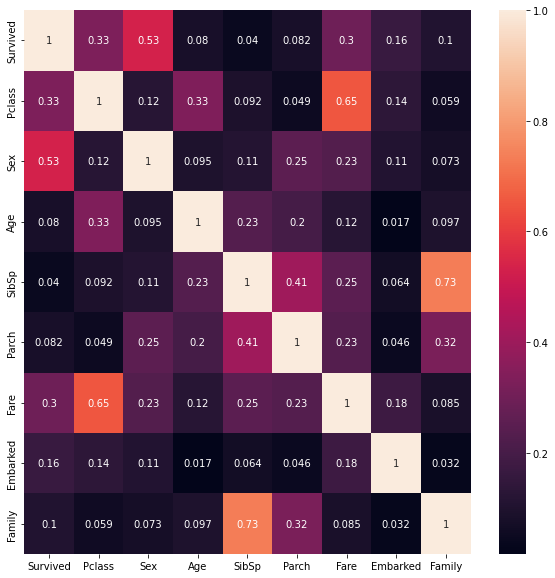

In [93]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.show()

1] SibSp has high correlation of 0.73 with family variable

2] Parch has high correlation with 0.32 with Family variable.

3] Pclass has correlation of 0.65 with Fare feature

4] SibSp and Prach have moderate correlation of 0.41 among them.

6] SibSp have  correaltion  of 0.04 with target

7] Parch have 0.082 with target.

8] family have 0.1 with target

In [94]:
from statsmodels.stats.outliers_influence  import variance_inflation_factor

In [95]:
feat1=df.drop('Survived',axis=1).to_numpy() # feature convert to numpy array 
m1=df.drop('Survived',axis=1)

VIF1=pd.DataFrame()

VIF1['Features']=m1.columns
VIF1['vif']=[variance_inflation_factor(feat1,i)  for i in range(m1.shape[1])]
VIF1

,Features,vif
0,Pclass,6.230080
1,Sex,3.138643
2,Age,5.638522
3,SibSp,inf
4,Parch,inf
5,Fare,2.326431
6,Embarked,4.814473
7,Family,inf


1] There is high multicollinearity exist between SibSp and Parch and Family.It is required to remove one of them as there is high correlation among them


2] we will remove  SibSp  to remove multicollinearity.

In [96]:
feat2=df.drop(columns=["SibSp",'Survived'],axis=1).to_numpy() # feature convert to numpy array 
m2=df.drop(columns=["SibSp",'Survived'],axis=1)

VIF2=pd.DataFrame()

VIF2['Features']=m2.columns
VIF2['vif']=[variance_inflation_factor(feat2,i)  for i in range(m2.shape[1])]
VIF2

,Features,vif
0,Pclass,6.230080
1,Sex,3.138643
2,Age,5.638522
3,Parch,1.804938
4,Fare,2.326431
5,Embarked,4.814473
6,Family,1.287752


* Multicollinearity has remove as SibSp feature is removed which have least correlation with target.

In [97]:
df=df.drop(columns=['SibSp'],axis=1)

Lets analyse for skewness in continuous feature.

In [98]:
cont

['Age', 'Fare']

In [99]:
df[cont].skew()

Age     0.222625
Fare    2.279424
dtype: float64

<AxesSubplot:>

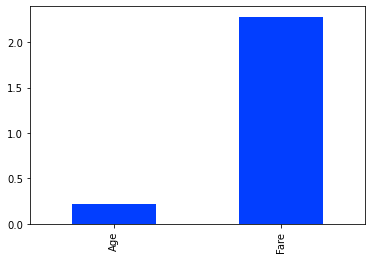

In [100]:
df[cont].skew().plot.bar()

* It is required to perform transformation on feature to handle skewness.

In [101]:
from sklearn.preprocessing import PowerTransformer
ptr=PowerTransformer(method='yeo-johnson')
df[cont]=ptr.fit_transform(df[cont])

* Analyse skewness after transformation with yeo-johnson method

In [102]:
df[cont].skew()

Age     0.022397
Fare   -0.009414
dtype: float64

<AxesSubplot:>

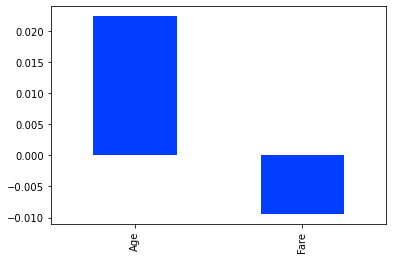

In [103]:
df[cont].skew().plot.bar()

* Spliting data into predictors and label

In [104]:
predictors=df.drop('Survived',axis=1)
label=df['Survived']

* Standardiztion with StandardScaler

In [105]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(predictors)

* There is data imbalanced observe after skewness removal.we will use oversampling technique to handle imbalanced.

In [106]:
from imblearn.over_sampling import SMOTE

sm=SMOTE(0.80,k_neighbors=3,random_state=42)
x,y=sm.fit_resample(x_scaled,label)



In [107]:
x.shape

(966, 7)

In [108]:
y.shape

(966,)

<AxesSubplot:>

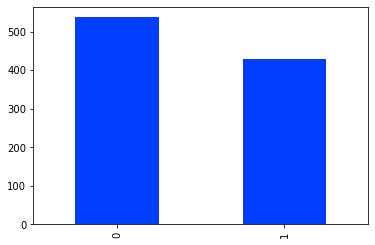

In [109]:
y.value_counts().plot.bar()

In [110]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier


from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve,plot_roc_curve

In [111]:
from sklearn.model_selection import train_test_split


maxac=0
maxRs=0
for i  in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    clf=LogisticRegression()
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    print("acuracy score ",acc,'Random sate ',i)
    
    if acc>maxac:
        maxac=acc
        maxRs=i
        print("Accuracy",maxac,"random_state",maxRs)
        
        

acuracy score  0.8041237113402062 Random sate  1
Accuracy 0.8041237113402062 random_state 1
acuracy score  0.8041237113402062 Random sate  2
acuracy score  0.7525773195876289 Random sate  3
acuracy score  0.8041237113402062 Random sate  4
acuracy score  0.7525773195876289 Random sate  5
acuracy score  0.7422680412371134 Random sate  6
acuracy score  0.7938144329896907 Random sate  7
acuracy score  0.7731958762886598 Random sate  8
acuracy score  0.7835051546391752 Random sate  9
acuracy score  0.788659793814433 Random sate  10
acuracy score  0.8195876288659794 Random sate  11
Accuracy 0.8195876288659794 random_state 11
acuracy score  0.7835051546391752 Random sate  12
acuracy score  0.7731958762886598 Random sate  13
acuracy score  0.7680412371134021 Random sate  14
acuracy score  0.788659793814433 Random sate  15
acuracy score  0.7938144329896907 Random sate  16
acuracy score  0.7783505154639175 Random sate  17
acuracy score  0.7835051546391752 Random sate  18
acuracy score  0.7577319

In [112]:
print("Maximum accuracy Score is {0} and Random state is {1}".format(maxac,maxRs))

Maximum accuracy Score is 0.8402061855670103 and Random state is 132


* Spliting data into train and test with random_state = 89

In [113]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=132)

* score function

In [114]:
def Cscore(clf,x_trn,y_trn,x_tst,y_tst,train_score=True):
    if train_score:
        ypred_train=clf.predict(x_trn)
        print('******** Train Results***************')
        print("Train Accuracy Score is ",accuracy_score(y_trn,ypred_train))
        print('******************************************************')
        print("Train roc_auc_Score is ",roc_auc_score(y_trn,ypred_train))
        print('-'*50)
        
    elif train_score==False:
        ypred_test=clf.predict(x_tst)
        print('\n******** Test Results***************')
        print("Test Accuracy Score is ", accuracy_score(y_tst,ypred_test))
        print('******************************************************')
        print("Test Precision Score is ", precision_score(y_tst,ypred_test))
        print('******************************************************')
        print("Test f1 Score is ", f1_score(y_tst,ypred_test))
        print('******************************************************')
        print("Test Recall Score is ", recall_score(y_tst,ypred_test))
        print('******************************************************')
        print("Test roc_auc_Score is ",roc_auc_score(y_tst,ypred_test))
        print('-'*50)
        print('\n Classification Report \n ',classification_report(y_tst,ypred_test,digits=3))
        print('-'*50)
        print('\n Confusion Matrix  \n\n',confusion_matrix(y_tst,ypred_test))

# Logistic Regression

In [115]:
Lr1=LogisticRegression()
Lr1.fit(x_train,y_train)
Cscore(Lr1,x_train,y_train,x_test,y_test,train_score=True)
Cscore(Lr1,x_train,y_train,x_test,y_test,train_score=False)

******** Train Results***************
Train Accuracy Score is  0.7797927461139896
******************************************************
Train roc_auc_Score is  0.7772571622308866
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.8402061855670103
******************************************************
Test Precision Score is  0.8493150684931506
******************************************************
Test f1 Score is  0.7999999999999999
******************************************************
Test Recall Score is  0.7560975609756098
******************************************************
Test roc_auc_Score is  0.828941637630662
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.835     0.902     0.867       112
           1      0.849     0.756     0.800        82

    accuracy                          0.840       194
   macro 

# DecisionTreeClassifier

In [116]:
dt1=DecisionTreeClassifier()
dt1.fit(x_train,y_train)
Cscore(dt1,x_train,y_train,x_test,y_test,train_score=True)
Cscore(dt1,x_train,y_train,x_test,y_test,train_score=False)

******** Train Results***************
Train Accuracy Score is  0.9831606217616581
******************************************************
Train roc_auc_Score is  0.9817969147313105
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.8247422680412371
******************************************************
Test Precision Score is  0.7926829268292683
******************************************************
Test f1 Score is  0.7926829268292683
******************************************************
Test Recall Score is  0.7926829268292683
******************************************************
Test roc_auc_Score is  0.820448606271777
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.848     0.848     0.848       112
           1      0.793     0.793     0.793        82

    accuracy                          0.825       194
   macro 

# KNeighborsClassifier


In [117]:


knn1=KNeighborsClassifier()
knn1.fit(x_train,y_train)

Cscore(knn1,x_train,y_train,x_test,y_test,train_score=True)
Cscore(knn1,x_train,y_train,x_test,y_test,train_score=False)

******** Train Results***************
Train Accuracy Score is  0.8678756476683938
******************************************************
Train roc_auc_Score is  0.8662485166977453
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.8195876288659794
******************************************************
Test Precision Score is  0.7764705882352941
******************************************************
Test f1 Score is  0.7904191616766466
******************************************************
Test Recall Score is  0.8048780487804879
******************************************************
Test roc_auc_Score is  0.8176175958188153
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.853     0.830     0.842       112
           1      0.776     0.805     0.790        82

    accuracy                          0.820       194
   macro

In [118]:
# GradientBoostingClassifier


In [119]:


gbdt1=GradientBoostingClassifier()
gbdt1.fit(x_train,y_train)

Cscore(gbdt1,x_train,y_train,x_test,y_test,train_score=True)
Cscore(gbdt1,x_train,y_train,x_test,y_test,train_score=False)

******** Train Results***************
Train Accuracy Score is  0.9002590673575129
******************************************************
Train roc_auc_Score is  0.8985692490252585
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.8608247422680413
******************************************************
Test Precision Score is  0.8481012658227848
******************************************************
Test f1 Score is  0.8322981366459627
******************************************************
Test Recall Score is  0.8170731707317073
******************************************************
Test roc_auc_Score is  0.8549651567944251
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.870     0.893     0.881       112
           1      0.848     0.817     0.832        82

    accuracy                          0.861       194
   macro

In [120]:
# RandomForestClassifier


In [121]:

rf1=RandomForestClassifier()
rf1.fit(x_train,y_train)

Cscore(rf1,x_train,y_train,x_test,y_test,train_score=True)
Cscore(rf1,x_train,y_train,x_test,y_test,train_score=False)



******** Train Results***************
Train Accuracy Score is  0.9831606217616581
******************************************************
Train roc_auc_Score is  0.983383624343109
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.8402061855670103
******************************************************
Test Precision Score is  0.8072289156626506
******************************************************
Test f1 Score is  0.812121212121212
******************************************************
Test Recall Score is  0.8170731707317073
******************************************************
Test roc_auc_Score is  0.8371080139372823
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.865     0.857     0.861       112
           1      0.807     0.817     0.812        82

    accuracy                          0.840       194
   macro a

In [122]:
# XGBClassifier


In [123]:
# XGBClassifier
xgc1=XGBClassifier()
xgc1.fit(x_train,y_train)

Cscore(xgc1,x_train,y_train,x_test,y_test,train_score=True)
Cscore(xgc1,x_train,y_train,x_test,y_test,train_score=False)


******** Train Results***************
Train Accuracy Score is  0.977979274611399
******************************************************
Train roc_auc_Score is  0.9773554839803356
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.8505154639175257
******************************************************
Test Precision Score is  0.8192771084337349
******************************************************
Test f1 Score is  0.8242424242424242
******************************************************
Test Recall Score is  0.8292682926829268
******************************************************
Test roc_auc_Score is  0.8476698606271776
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.874     0.866     0.870       112
           1      0.819     0.829     0.824        82

    accuracy                          0.851       194
   macro 

# AdaBoostClassifier


In [124]:

ada1=AdaBoostClassifier()
ada1.fit(x_train,y_train)

Cscore(ada1,x_train,y_train,x_test,y_test,train_score=True)
Cscore(ada1,x_train,y_train,x_test,y_test,train_score=False)


******** Train Results***************
Train Accuracy Score is  0.8134715025906736
******************************************************
Train roc_auc_Score is  0.810754365146635
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.8402061855670103
******************************************************
Test Precision Score is  0.8311688311688312
******************************************************
Test f1 Score is  0.8050314465408805
******************************************************
Test Recall Score is  0.7804878048780488
******************************************************
Test roc_auc_Score is  0.8322081881533101
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.846     0.884     0.865       112
           1      0.831     0.780     0.805        82

    accuracy                          0.840       194
   macro 

* Finding best cv param for performing and obtaining most generalized cross validation score

In [125]:
from sklearn.model_selection import cross_val_score


for i in [3,5,7,8,9,10]:
    cv=cross_val_score(LogisticRegression(),x,y,cv=i,scoring='accuracy')
    print("Accuracy score is {0} for cv={1}".format(cv.mean(),i))

Accuracy score is 0.7795031055900621 for cv=3
Accuracy score is 0.7846856471342344 for cv=5
Accuracy score is 0.7826086956521738 for cv=7
Accuracy score is 0.7816115702479338 for cv=8
Accuracy score is 0.7774027922003 for cv=9
Accuracy score is 0.7816043814432989 for cv=10


* Lets use cv=9 where accuracy score is most generalized

In [126]:
classifiers =[Lr1,knn1,gbdt1,dt1,rf1,xgc1,ada1]
name=['LogisticRegression','KNeighborsClassifier','GradientBoostClassifier',
      'DecisionTreeClassifier','RandomForestClassifier','XGBoostClassifier','AdaBoostClassifier']

In [127]:
test_score=[]
ra_score=[]
train_score=[]
for i in classifiers:
    ypred_test=i.predict(x_test)
    ypred_train=i.predict(x_train)
    test_score.append(accuracy_score(y_test,ypred_test))
    ra_score.append(roc_auc_score(y_test,ypred_test))
    train_score.append(accuracy_score(y_train,ypred_train))

In [128]:
cv_scores_mean=[]
cv_scores=[]
for clf in classifiers:
    scr=cross_val_score(clf,x,y,cv=9,scoring="accuracy")
    cv_scores.append(scr)   
    cv_scores_mean.append(scr.mean())
cv_scores_mean   

[0.7774027922003,
 0.8085265951309565,
 0.8136898580823815,
 0.7878543132956425,
 0.8220068458905426,
 0.8147955847852004,
 0.7939886927425869]

In [129]:
Eval_clf=pd.DataFrame({'Classifier':name,'Train Accuracy Score':train_score,'Test Accuracy Score':test_score,
                      'ROC_AUC_Score':ra_score,'Validation Score':cv_scores_mean})
Eval_clf

,Classifier,Train Accuracy Score,Test Accuracy Score,ROC_AUC_Score,Validation Score
0,LogisticRegression,0.779793,0.840206,0.828942,0.777403
1,KNeighborsClassifier,0.867876,0.819588,0.817618,0.808527
2,GradientBoostClassifier,0.900259,0.860825,0.854965,0.813690
3,DecisionTreeClassifier,0.983161,0.824742,0.820449,0.787854
4,RandomForestClassifier,0.983161,0.840206,0.837108,0.822007
5,XGBoostClassifier,0.977979,0.850515,0.847670,0.814796
6,AdaBoostClassifier,0.813472,0.840206,0.832208,0.793989


In [130]:
Eval_clf["criteria of selecting best model"]=Eval_clf['Test Accuracy Score']-Eval_clf['Validation Score']

In [131]:
Eval_clf

,Classifier,Train Accuracy Score,Test Accuracy Score,ROC_AUC_Score,Validation Score,criteria of selecting best model
0,LogisticRegression,0.779793,0.840206,0.828942,0.777403,0.062803
1,KNeighborsClassifier,0.867876,0.819588,0.817618,0.808527,0.011061
2,GradientBoostClassifier,0.900259,0.860825,0.854965,0.813690,0.047135
3,DecisionTreeClassifier,0.983161,0.824742,0.820449,0.787854,0.036888
4,RandomForestClassifier,0.983161,0.840206,0.837108,0.822007,0.018199
5,XGBoostClassifier,0.977979,0.850515,0.847670,0.814796,0.035720
6,AdaBoostClassifier,0.813472,0.840206,0.832208,0.793989,0.046217


In [132]:
Eval_clf.sort_values(by="criteria of selecting best model",ascending=True)

,Classifier,Train Accuracy Score,Test Accuracy Score,ROC_AUC_Score,Validation Score,criteria of selecting best model
1,KNeighborsClassifier,0.867876,0.819588,0.817618,0.808527,0.011061
4,RandomForestClassifier,0.983161,0.840206,0.837108,0.822007,0.018199
5,XGBoostClassifier,0.977979,0.850515,0.847670,0.814796,0.035720
3,DecisionTreeClassifier,0.983161,0.824742,0.820449,0.787854,0.036888
6,AdaBoostClassifier,0.813472,0.840206,0.832208,0.793989,0.046217
2,GradientBoostClassifier,0.900259,0.860825,0.854965,0.813690,0.047135
0,LogisticRegression,0.779793,0.840206,0.828942,0.777403,0.062803


* There is no overfitting observe in KNeighborsClasssifier and RandomForesClasssifier

1] Kneighborsclassifier is performing best having very less chance of overfitting.

2] RandomFOrestClassifier is next to KNeighborsClassifier

* Definig function for Plotting roc_auc curve

In [133]:
def TrainAUCplot(clf_list,x_train,y_train):
    
    plt.figure(figsize=(20,20))
    fig=plot_roc_curve(clf_list[0],x_train,y_train)
    for i in clf_list[1:]:
        plot_roc_curve(i,x_train,y_train,ax=fig.ax_)
    plt.legend(prop={'size':11},loc='lower right')
    plt.title("AUC ROC CURVE for Train data")
    plt.show()

<Figure size 1440x1440 with 0 Axes>

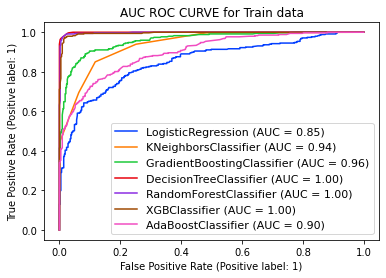

In [134]:
TrainAUCplot(classifiers,x_train,y_train)

In [135]:
def TestAUCplot(clf_list,x_test,y_test):
    
    plt.figure(figsize=(20,20))
    fig=plot_roc_curve(clf_list[0],x_test,y_test)
    for i in clf_list[1:]:
        plot_roc_curve(i,x_test,y_test,ax=fig.ax_)
    plt.legend(prop={'size':11},loc='lower right')
    plt.title("AUC ROC CURVE for Test data")
    plt.show()

<Figure size 1440x1440 with 0 Axes>

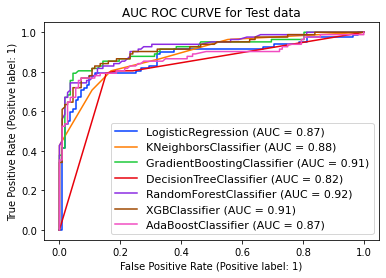

In [136]:
TestAUCplot(classifiers,x_test,y_test)

* KNeighborsClasifier

     1] Test accuracy score 81.95% 

     2] Validation score   80.85%
     
     3] Test auc           0.88
     
     4] roc_auc_score      81.76 
        

* RandomForestClasifier 
     
     1] Test accuracy score 83.50% 
     
     2] Validation score   81.79%
     
     3] Test auc           0.92
     
     4] roc_auc_score      83.26        
        
# we will perform Hyperparameter tunning on both classifiers choose one of them as both classifiers have no sign of Overfitting        

# Hyperparameter tunning with KNeighborsClassifier

In [137]:
from sklearn.model_selection import GridSearchCV


param2={'n_neighbors':[3,5,7,9,11,13,15],'metric':["minkowski",'cosine'],'leaf_size':[3,5,6,20,25,30],
        'weights':['uniform','distance'],'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],'p':[1,2]}

grid2=GridSearchCV(KNeighborsClassifier(),param_grid=param2,cv=5).fit(x_train,y_train) 
print(grid2.best_params_)
     


{'algorithm': 'auto', 'leaf_size': 3, 'metric': 'minkowski', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}


In [138]:
knn2=grid2.best_estimator_
knn2.fit(x_train,y_train)

Cscore(knn1,x_train,y_train,x_test,y_test,train_score=True)
Cscore(knn1,x_train,y_train,x_test,y_test,train_score=False)


******** Train Results***************
Train Accuracy Score is  0.8678756476683938
******************************************************
Train roc_auc_Score is  0.8662485166977453
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.8195876288659794
******************************************************
Test Precision Score is  0.7764705882352941
******************************************************
Test f1 Score is  0.7904191616766466
******************************************************
Test Recall Score is  0.8048780487804879
******************************************************
Test roc_auc_Score is  0.8176175958188153
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.853     0.830     0.842       112
           1      0.776     0.805     0.790        82

    accuracy                          0.820       194
   macro

* hyperparameter tunning with Randomforest classifier

In [139]:
param3={'criterion' : ['gini','entropy','log_loss'],
                     'max_depth' :[4,5,6,7,8,9],
                      'min_samples_split' :[1,2,3,4,5,7], 
                     'min_samples_leaf' :[1,2,3,4,5,6],
                     'bootstrap':['True'],
                      'oob_score':['True'],
                     'max_samples' : [0.7,0.8],
                     
                      }


grid3=GridSearchCV(RandomForestClassifier(),param_grid=param3,cv=5).fit(x_train,y_train) 
print(grid3.best_params_)


{'bootstrap': 'True', 'criterion': 'log_loss', 'max_depth': 8, 'max_samples': 0.8, 'min_samples_leaf': 1, 'min_samples_split': 3, 'oob_score': 'True'}


In [140]:
rf2=grid3.best_estimator_
rf2.fit(x_train,y_train)

Cscore(rf2,x_train,y_train,x_test,y_test,train_score=True)
Cscore(rf2,x_train,y_train,x_test,y_test,train_score=False)


******** Train Results***************
Train Accuracy Score is  0.8976683937823834
******************************************************
Train roc_auc_Score is  0.8933073402271572
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.8402061855670103
******************************************************
Test Precision Score is  0.8148148148148148
******************************************************
Test f1 Score is  0.8098159509202455
******************************************************
Test Recall Score is  0.8048780487804879
******************************************************
Test roc_auc_Score is  0.8354747386759582
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.858     0.866     0.862       112
           1      0.815     0.805     0.810        82

    accuracy                          0.840       194
   macro

* As RandomForestClassifier has better test score with hyperparameter tunning.

* Lets  analyse for AUC_ROC_plot

* 1] KNClassifier Train VS Test auc roc plot

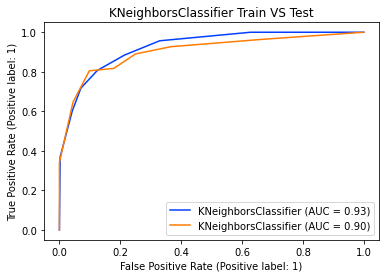

In [141]:
fig5=plot_roc_curve(knn2,x_train,y_train)
plot_roc_curve(knn2,x_test,y_test,ax=fig5.ax_)
plt.title("KNeighborsClassifier Train VS Test")

plt.show()

* 2]  RAndomForest classifier Test Vs Train ROC curve

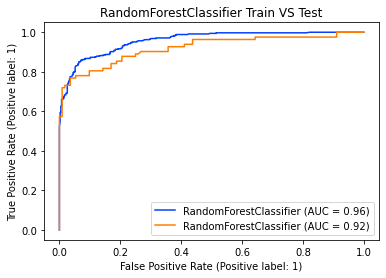

In [142]:
fig5=plot_roc_curve(rf2,x_train,y_train)
plot_roc_curve(rf2,x_test,y_test,ax=fig5.ax_,)
plt.title("RandomForestClassifier Train VS Test")
plt.show()

# AS from above figure , Random forest is best in all aspects we will finalize as it is as predicting algorithm with best params obtained in Hyperparameter tuning

* Saving algorithm

In [143]:
import joblib
joblib.dump(rf2,"TitanicRF.pkl")

['TitanicRF.pkl']